In [181]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import time
import calendar
%matplotlib inline
plt.rc("font",family="serif")

In [4]:
ls # confirm working directory

habanero_data_analysis.ipynb


In [5]:
therm = np.loadtxt('../prc/logged/Thermoutput_clean_ascii.csv', delimiter = ',', skiprows=1)

In [6]:
therm_time=therm[:,0]-266986
therm_temp=therm[:,1]

(-1000, 12000)

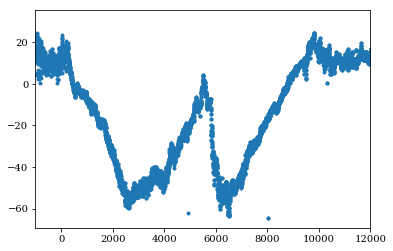

In [182]:
# Raw temperature data from thermocouple on Chonk

plt.plot(therm_time, therm_temp, '.')
plt.xlim(-1000, 12000)

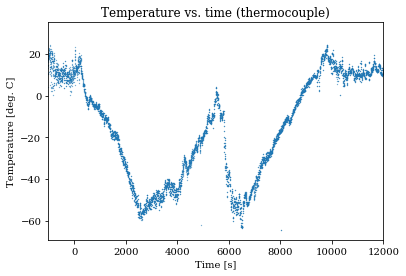

In [183]:
# Remove spurious points

lowlim  = 250.0
highlim = 9100.0
inds1 = np.nonzero(((therm_time < lowlim)+(therm_time > highlim)) * (therm_temp < 0))[0]
therm_temp[inds1]=np.nan
inds2 = np.nonzero((therm_temp < -65.0))[0]
therm_temp[inds2]=np.nan
inds3 = np.nonzero(therm_temp==0.0)[0]
therm_temp[inds3]=np.nan

plt.plot(therm_time, therm_temp, '.',markersize=0.5)
plt.title('Temperature vs. time (thermocouple)')
plt.xlim(-1000, 12000)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [deg. C]')
plt.savefig('temperature_time_therm.png',dpi=200)

In [99]:
uv = np.loadtxt('../prc/logged/UVoutput_clean_ascii.csv', delimiter = ',', skiprows=21)

In [100]:
uv_time=uv[:,0]-266986
#uv_time=uv[:,0]
uv_index=uv[:,1]

Text(0,0.5,'UV Index)')

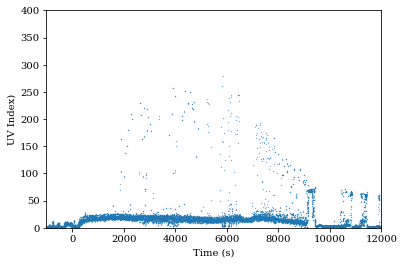

In [184]:
# Raw UV index data from the UV sensor on Chonk
plt.plot(uv_time, uv_index, '.',markersize=0.5)
plt.xlim(-1000, 12000)
plt.ylim(0, 400)
plt.xlabel('Time (s)')
plt.ylabel('UV Index)')

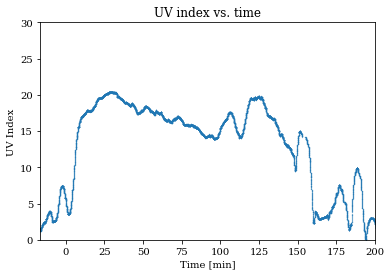

In [185]:
# We can filter the data somewhat 
import scipy.signal as ss
inds1 = np.nonzero(uv_index < 40)[0]

uv_time_keep  = uv_time[inds1]
uv_index_keep = uv_index[inds1]
uv_index_smooth = ss.savgol_filter(uv_index_keep,501,2)
plt.plot(uv_time[inds1]/60.0, uv_index_smooth, '.',markersize=0.5)

plt.xlim(-16.667, 200)
plt.ylim(0, 30)
plt.xlabel('Time [min]')
plt.ylabel('UV Index')
plt.title('UV index vs. time')
plt.savefig('uvindex_time.png',dpi=200)

In [12]:
bme = np.loadtxt('../prc/logged/bmeoutput_clean.csv', delimiter = ',', skiprows=1)

In [13]:
bme_time = bme[:,0]-264948
bme_temp = bme[:,1]
bme_pressure = bme[:,2]
bme_humidity = bme[:,3]

Text(0.5,1,'BME280 Temperature Readings')

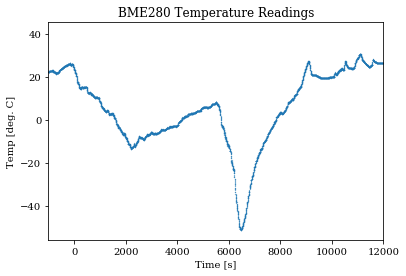

In [186]:
plt.plot(bme_time, bme_temp,'.',markersize=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Temp [deg. C]')
plt.xlim(-1000,12000)
plt.title('BME280 Temperature Readings')

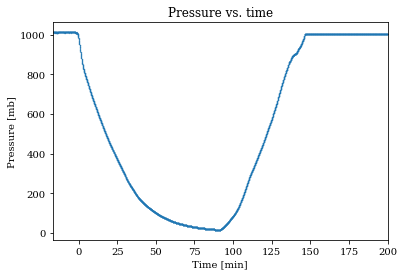

In [187]:
plt.plot(bme_time/60.0, bme_pressure,'.',markersize=0.5)
plt.ylabel('Pressure [mb]')
plt.xlabel('Time [min]')
plt.xlim(-16.6667,200)
plt.title('Pressure vs. time')
plt.savefig('pressure_time.png',dpi=200)

In [16]:
min(bme_pressure) #minimum pressure!

14.54

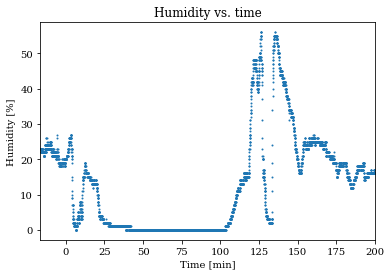

In [188]:
plt.plot(bme_time/60.0, bme_humidity, '.',markersize=2.0)
plt.xlabel('Time [min]')
plt.ylabel('Humidity [%]')
plt.xlim(-16.667, 200)
plt.title('Humidity vs. time')
plt.savefig('humidity_time.png',dpi=200)


In [18]:
co2 = np.loadtxt('../prc/logged/co2output_clean.csv', delimiter = ',', skiprows=1)

In [19]:
co2_time = co2[:,0]-264948
co2_content = co2[:,1]
co2_voc = co2[:,2]
co2_temp = co2[:,3]

(-1000, 3500)

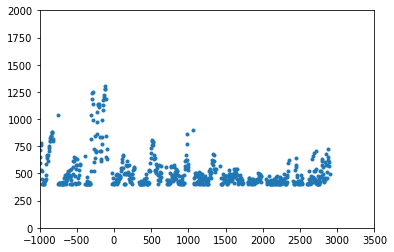

In [20]:
plt.plot(co2_time, co2_content,'.')
plt.ylim(0,2000)
plt.xlim(-1000,3500)

(-1000, 3500)

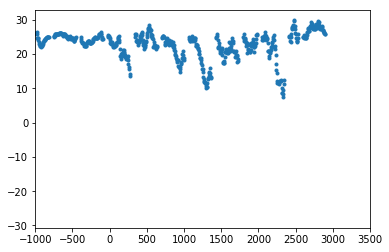

In [21]:
plt.plot(co2_time, co2_temp,'.')
plt.xlim(-1000,3500)

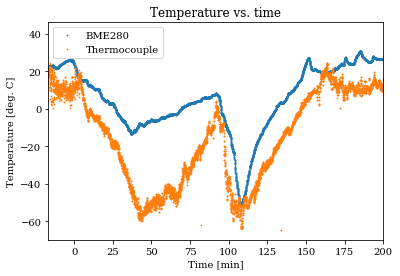

In [189]:
#plt.figure(figsize=(12,8))
plt.plot(bme_time/60.0, bme_temp, '.', label='BME280',markersize=1.5)
plt.plot(therm_time/60.0, therm_temp, '.', label='Thermocouple',markersize=1.5)
plt.title('Temperature vs. time')
plt.xlim(-16.667, 200)
plt.legend()
plt.xlabel('Time [min]')
plt.ylabel('Temperature [deg. C]')
plt.savefig('temperature_time_2sensors.png',dpi=200)

In [23]:
therm_array = []
for i,j in zip(therm_time, therm_temp):
    if j > -75:
        therm_array.append((i,j))
new_therm_time = [item[0] for item in therm_array]
new_therm_temp = [item[1] for item in therm_array]

In [24]:
data=[]
time_utc=[]
time_s=[]
alt=[]
with open('../prc/logged/WiPi_gps_cropt.csv') as infile:
    for line in infile:
        formatted_line=line.strip().split(',')
        data.append(formatted_line)
        time_utc.append(formatted_line[3])
        time_s.append(formatted_line[4])
        alt.append(formatted_line[5])
        

In [25]:
alt_floats=[float(item) for item in alt[2:]]
time_utc_floats=[calendar.timegm(time.strptime(item.strip(), '%Y-%m-%dT%H:%M:%S.000Z')) for item in time_utc[2:]]

In [26]:
time_since_launch = np.array(time_utc_floats)-1557599500

Text(0,0.5,'Altitude')

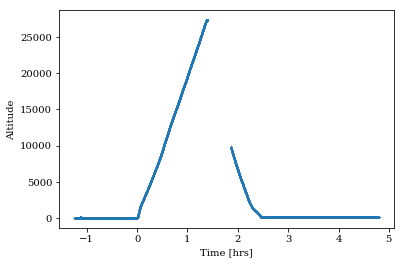

In [190]:
plt.plot(time_since_launch/3600.0, alt_floats,'.',markersize=1.0)
plt.xlabel('Time [hrs]')
plt.ylabel('Altitude')

In [28]:
aprs= np.loadtxt('../prc/aprs/aprs_reformatted_noquotes.csv', delimiter = ',', skiprows=1)

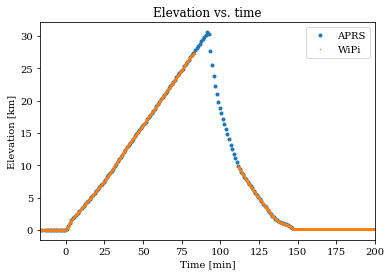

In [191]:
t_aprs=aprs[:,0]-1557599500
z_aprs=aprs[:,4]
plt.plot(t_aprs/60.0, z_aprs/1000.0,'.',label='APRS')
plt.plot(np.array(time_since_launch)/60.0, np.array(alt_floats)/1000.0,'.',markersize=1.0,label='WiPi')
plt.xlim(-16.667,200)
plt.xlabel('Time [min]')
plt.ylabel('Elevation [km]')
plt.title('Elevation vs. time')
plt.legend()
plt.savefig('elevation_time.png',dpi=200)



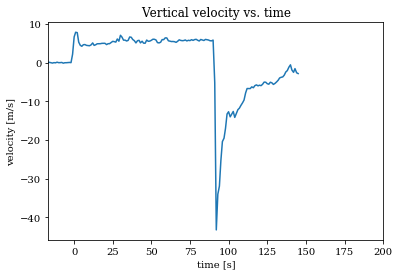

In [192]:
delx = np.diff(z_aprs)
delt = np.diff(t_aprs)
vel  = delx/delt
mean_delt = delt.mean()
t    = t_aprs - mean_delt/2.0
plt.plot(t[:-1]/60.0,vel)
plt.xlim(-16.667,200)
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.title('Vertical velocity vs. time')
plt.savefig('velocity_time.png',dpi=200)

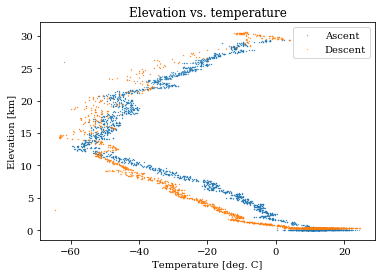

In [193]:
# Now for plots of elevation vs. measurement!

taxis = therm_time
xaxis = therm_temp

inds = np.nonzero((taxis > -1000.0) * (taxis < 14000.0))[0]
tnew = taxis[inds]

f_elev = np.interp(tnew-200, t_aprs, z_aprs)
f_elev2 = np.interp(tnew-260, t_aprs, z_aprs)

#plt.plot(tnew,f_elev)
#plt.plot(t_aprs,z_aprs,'.')

#plt.plot(tnew,therm_temp[inds],'.')
#plt.xlim(-1000,2000)

iup = np.nonzero(tnew <  5496.0)
idn = np.nonzero(tnew >= 5496.0)
plt.plot(xaxis[inds][iup],f_elev[iup]/1000.0,'.',markersize=0.5,label='Ascent')
plt.plot(xaxis[inds][idn],f_elev[idn]/1000.0,'.',markersize=0.5,label='Descent')
plt.xlabel('Temperature [deg. C]')
plt.ylabel('Elevation [km]')
plt.legend()
plt.title('Elevation vs. temperature')
plt.savefig('temperature_elevation.png',dpi=200)


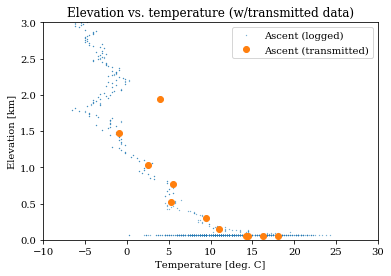

In [194]:

plt.plot(xaxis[inds][iup],f_elev2[iup]/1000.0,'.',markersize=0.5,label='Ascent (logged)')
#plt.plot(therm_temp[inds][idn],f_elev[idn]/1000.0,'.',markersize=0.5,label='Descent')
plt.xlabel('Temperature [deg. C]')
plt.ylabel('Elevation [km]')
plt.legend()

chonk_trans = np.loadtxt('../prc/transmit/chonk_therm_clean_noutc.csv',delimiter=',',skiprows=1)
z_trans = chonk_trans[:,2]
T_trans = chonk_trans[:,4]
plt.plot(T_trans, z_trans/1000.0,'o',label='Ascent (transmitted)')
plt.xlim(-10,30)
plt.ylim(0,3.0)
plt.title('Elevation vs. temperature (w/transmitted data)')
plt.legend()
plt.savefig('temperature_elevation_transmitted.png',dpi=200)

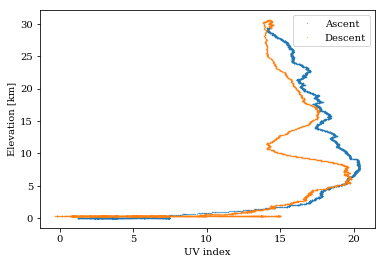

In [195]:
# Now for plots of elevation vs. measurement!

taxis = uv_time_keep
xaxis = uv_index_smooth

inds = np.nonzero((taxis > -1000.0) * (taxis < 14000.0))[0]
tnew = taxis[inds]
f_elev = np.interp(tnew-200, t_aprs, z_aprs)
f_elev2 = np.interp(tnew-260, t_aprs, z_aprs)


#plt.plot(tnew,f_elev)
#plt.plot(t_aprs,z_aprs,'.')

#plt.plot(tnew,therm_temp[inds],'.')
#plt.xlim(-1000,2000)

iup = np.nonzero(tnew <  5496.0)
idn = np.nonzero(tnew >= 5496.0)
plt.plot(xaxis[inds][iup],f_elev[iup]/1000.0,'.',markersize=0.5,label='Ascent')
plt.plot(xaxis[inds][idn],f_elev[idn]/1000.0,'.',markersize=0.5,label='Descent')
plt.xlabel('UV index')
plt.ylabel('Elevation [km]')
plt.legend()
plt.savefig('uvindex_elevation.png',dpi=200)


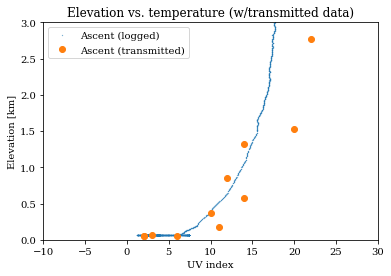

In [196]:
plt.plot(xaxis[inds][iup],f_elev2[iup]/1000.0,'.',markersize=0.5,label='Ascent (logged)')
#plt.plot(therm_temp[inds][idn],f_elev[idn]/1000.0,'.',markersize=0.5,label='Descent')
plt.xlabel('UV index')
plt.ylabel('Elevation [km]')
plt.legend()

chonk_trans = np.loadtxt('../prc/transmit/chonk_ultrav_clean_noutc.csv',delimiter=',',skiprows=1)
z_trans = chonk_trans[:,2]
T_trans = chonk_trans[:,4]
plt.plot(T_trans, z_trans/1000.0,'o',label='Ascent (transmitted)')
plt.xlim(-10,30)
plt.ylim(0,3.0)
plt.title('Elevation vs. temperature (w/transmitted data)')
plt.legend()
plt.savefig('uvindex_elevation_transmitted.png',dpi=200)

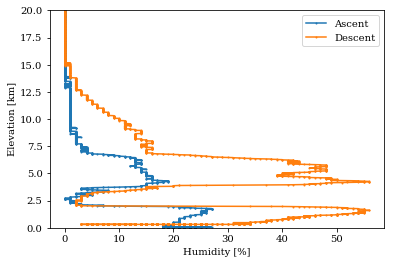

In [197]:
# Now for plots of elevation vs. measurement!

taxis = bme_time
xaxis = bme_humidity

inds = np.nonzero((taxis > -1000.0) * (taxis < 14000.0))[0]
tnew = taxis[inds]
f_elev = np.interp(tnew+60, t_aprs, z_aprs)
f_elev2 = np.interp(tnew+60, t_aprs, z_aprs)


#plt.plot(tnew,f_elev)
#plt.plot(t_aprs,z_aprs,'.')

#plt.plot(tnew,therm_temp[inds],'.')
#plt.xlim(-1000,2000)

iup = np.nonzero(tnew <  5496.0)
idn = np.nonzero(tnew >= 5496.0)
plt.plot(xaxis[inds][iup],f_elev[iup]/1000.0,'.-',markersize=2.0,label='Ascent')
plt.plot(xaxis[inds][idn],f_elev[idn]/1000.0,'.-',markersize=2.0,label='Descent')
plt.ylim(0,20)
plt.xlabel('Humidity [%]')
plt.ylabel('Elevation [km]')
plt.legend()
plt.savefig('humidity_elevation.png',dpi=200)


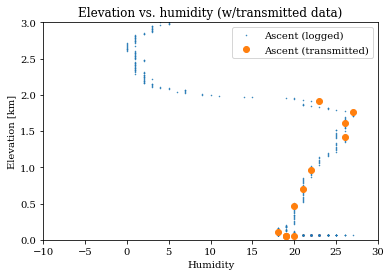

In [198]:
plt.plot(xaxis[inds][iup],f_elev2[iup]/1000.0,'.',markersize=1.0,label='Ascent (logged)')
#plt.plot(therm_temp[inds][idn],f_elev[idn]/1000.0,'.',markersize=0.5,label='Descent')
plt.xlabel('Humidity')
plt.ylabel('Elevation [km]')
plt.legend()

chonk_trans = np.loadtxt('../prc/transmit/smonk_humidy_clean_noutc.csv',delimiter=',',skiprows=1)
z_trans = chonk_trans[:,2]
T_trans = chonk_trans[:,6]
plt.plot(T_trans, z_trans/1000.0,'o',label='Ascent (transmitted)')
plt.xlim(-10,30)
plt.ylim(0,3.0)
plt.title('Elevation vs. humidity (w/transmitted data)')
plt.legend()
plt.savefig('humidity_elevation_transmitted.png',dpi=200)

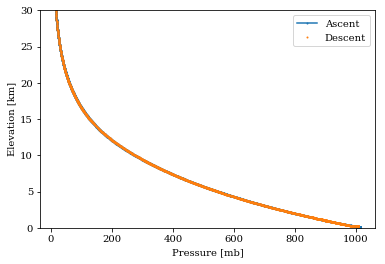

In [199]:
# Now for plots of elevation vs. measurement!

taxis = bme_time
xaxis = bme_pressure

inds = np.nonzero((taxis > -1000.0) * (taxis < 14000.0))[0]
tnew = taxis[inds]
f_elev = np.interp(tnew+60, t_aprs, z_aprs)
f_elev2 = np.interp(tnew+60, t_aprs, z_aprs)


#plt.plot(tnew,f_elev)
#plt.plot(t_aprs,z_aprs,'.')

#plt.plot(tnew,therm_temp[inds],'.')
#plt.xlim(-1000,2000)

iup = np.nonzero(tnew <  5496.0)
idn = np.nonzero(tnew >= 5496.0)
plt.plot(xaxis[inds][iup],f_elev[iup]/1000.0,'.-',markersize=2.0,label='Ascent')
plt.plot(xaxis[inds][idn],f_elev[idn]/1000.0,'.',markersize=2.0,label='Descent')
plt.ylim(0,30)
plt.xlabel('Pressure [mb]')
plt.ylabel('Elevation [km]')
plt.legend()
plt.savefig('pressure_elevation.png',dpi=200)


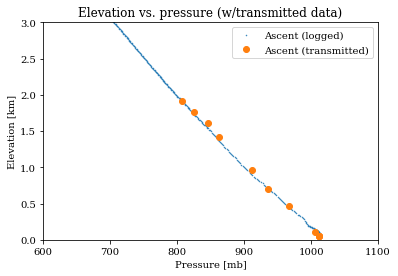

In [200]:
plt.plot(xaxis[inds][iup],f_elev2[iup]/1000.0,'.',markersize=1.0,label='Ascent (logged)')
#plt.plot(therm_temp[inds][idn],f_elev[idn]/1000.0,'.',markersize=0.5,label='Descent')
plt.xlabel('Pressure [mb]')
plt.ylabel('Elevation [km]')
plt.legend()

chonk_trans = np.loadtxt('../prc/transmit/smonk_humidy_clean_noutc.csv',delimiter=',',skiprows=1)
z_trans = chonk_trans[:,2]
T_trans = chonk_trans[:,5]
plt.plot(T_trans, z_trans/1000.0,'o',label='Ascent (transmitted)')
plt.ylim(0,3.0)
plt.xlim(600,1100)
plt.title('Elevation vs. pressure (w/transmitted data)')
plt.legend()
plt.savefig('pressure_elevation_transmitted.png',dpi=200)